<a href="https://colab.research.google.com/github/Ajay07pandey/AI_agent_LangGraph/blob/main/Deep%20Agents/Basic_Deep_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Agents overview



Build agents that can plan, use subagents, and leverage file systems for complex tasks

deepagents is a standalone library for building agents that can tackle complex, multi-step tasks. Built on LangGraph and inspired by applications like Claude Code, Deep Research, and Manus, deep agents come with planning capabilities, file systems for context management, and the ability to spawn subagents.


### When to use deep agents
Use deep agents when you need agents that can:

- Handle complex, multi-step tasks that require planning and decomposition
- Manage large amounts of context through file system tools
- Delegate work to specialized subagents for context isolation
- Persist memory across conversations and threads

In [3]:
!pip install -q langchain-google-genai deepagents langchain langchain-groq tavily-python

In [4]:
### Basic deep agent
import os
from google.colab import userdata

# Retrieve keys from Colab Secrets and set them as environment variables
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

# Verify (Optional - delete this line after testing)
print("API Keys have been set successfully.")

API Keys have been set successfully.


In [5]:
from typing import Literal

In [6]:
### Tools- Internet search
from tavily import TavilyClient
from typing import Literal

tavily_client=TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

def web_search(query:str,max_results:int=5,
topic: Literal["general","sports","news","finance"]="general",
include_raw_content:bool=False):
    """Run a web search"""
    return tavily_client.search(query,
    max_results=max_results,include_raw_content=include_raw_content,topic=topic)



In [7]:
from langchain.chat_models import init_chat_model

model=init_chat_model("groq:qwen/qwen3-32b")
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7bf7328385c0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7bf73284ccb0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

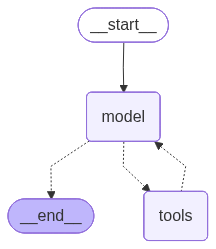

In [8]:
## Basic Agent
from langchain.agents import create_agent


simple_agent=create_agent(
    model=model,
    tools=[web_search]
)
simple_agent

In [12]:
simple_result = simple_agent.invoke({"messages": [{"role": "user", "content": "What is deepagent?"}]})
simple_result

{'messages': [HumanMessage(content='What is deepagent?', additional_kwargs={}, response_metadata={}, id='60c5c29f-92e4-4b43-a74d-6021bb5b86a9'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is deepagent?" First, I need to understand what they\'re looking for. DeepAgent sounds like a term related to artificial intelligence or machine learning, possibly a framework or a tool. Since I don\'t have prior knowledge of a specific product or service called DeepAgent, I should conduct a web search to gather information.\n\nLooking at the tools provided, there\'s a function called web_search. The parameters include a query, which is required, and optional ones like max_results, include_raw_content, and topic. The user\'s question is general, so the topic can stay as "general". The max_results default is 5, which should be sufficient. I don\'t need raw content, so include_raw_content can be false.\n\nI should structure the tool call with the que

In [13]:
simple_result["messages"][-1].content

'DeepAgent is an advanced AI assistant designed to handle complex tasks across various domains. Here\'s a concise overview based on the search results:\n\n1. **Core Functionality**:  \n   - A sophisticated AI agent capable of performing tasks that typically require human intervention, such as customer support (via live chatbots and AI chatbots) and automating daily workflows [GoZen, Abacus AI].\n\n2. **Key Features**:  \n   - **Automation**: Builds apps, analyzes data, generates reports, and manages workflows.  \n   - **Real-Time Research**: Gathers insights from live web data, organizes findings into structured reports, and creates visualizations.  \n   - **Creative Tools**: Produces polished presentations (PowerPoint/PDF), designs websites, and supports video/image creation.  \n   - **Specialized Tools**: Financial analysis, Slack communication optimization, and workflow automation for businesses [Abacus AI Blog].\n\n3. **Use Cases**:  \n   - Software development (app/website creatio

In [20]:
simple_result["messages"][0].content

'What is deepagent?'

In [21]:
simple_result["messages"][1].content

''

In [22]:
simple_result["messages"][2].content

'{"query": "What is DeepAgent?", "response_time": 0.78, "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://ai.plainenglish.io/deepagent-the-ultimate-ai-assistant-for-complex-tasks-099019ee47a3", "title": "DeepAgent: The Ultimate AI Assistant for Complex Tasks", "content": "DeepAgent is a sophisticated AI agent capable of performing a wide array of tasks that traditionally require human intervention.", "score": 0.9296516, "raw_content": null}, {"url": "https://gozen.io/deepagent/", "title": "An AI agent to automate your daily tasks", "content": "GoZen DeepAgent is an agent builder that can be used as customer support software. It can be used as live support bot as well as AI chatbot.", "score": 0.9240941, "raw_content": null}, {"url": "https://deepagent.abacus.ai/", "title": "Abacus AI Deep Agent", "content": "![Image 4](https://deepagent.abacus.ai/static/imgs/deepagent/play_button_3x.webp)![Image 5](https://deepagent.abacus.ai/static/imgs/deepagent/

In [23]:
simple_result["messages"][3].content

'DeepAgent is an advanced AI assistant designed to handle complex tasks across various domains. Here\'s a concise overview based on the search results:\n\n1. **Core Functionality**:  \n   - A sophisticated AI agent capable of performing tasks that typically require human intervention, such as customer support (via live chatbots and AI chatbots) and automating daily workflows [GoZen, Abacus AI].\n\n2. **Key Features**:  \n   - **Automation**: Builds apps, analyzes data, generates reports, and manages workflows.  \n   - **Real-Time Research**: Gathers insights from live web data, organizes findings into structured reports, and creates visualizations.  \n   - **Creative Tools**: Produces polished presentations (PowerPoint/PDF), designs websites, and supports video/image creation.  \n   - **Specialized Tools**: Financial analysis, Slack communication optimization, and workflow automation for businesses [Abacus AI Blog].\n\n3. **Use Cases**:  \n   - Software development (app/website creatio

In [27]:
simple_result["messages"][-2].content

'{"query": "What is DeepAgent?", "response_time": 0.78, "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://ai.plainenglish.io/deepagent-the-ultimate-ai-assistant-for-complex-tasks-099019ee47a3", "title": "DeepAgent: The Ultimate AI Assistant for Complex Tasks", "content": "DeepAgent is a sophisticated AI agent capable of performing a wide array of tasks that traditionally require human intervention.", "score": 0.9296516, "raw_content": null}, {"url": "https://gozen.io/deepagent/", "title": "An AI agent to automate your daily tasks", "content": "GoZen DeepAgent is an agent builder that can be used as customer support software. It can be used as live support bot as well as AI chatbot.", "score": 0.9240941, "raw_content": null}, {"url": "https://deepagent.abacus.ai/", "title": "Abacus AI Deep Agent", "content": "![Image 4](https://deepagent.abacus.ai/static/imgs/deepagent/play_button_3x.webp)![Image 5](https://deepagent.abacus.ai/static/imgs/deepagent/

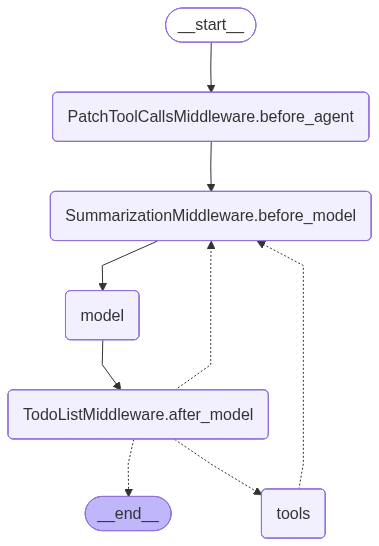

In [9]:
### Create a deep agent
## Prompt

## agent

from deepagents import create_deep_agent

deepagent=create_deep_agent(
    model=model,
    tools=[web_search],
    system_prompt="Act as a researcher"
)
deepagent

In [ ]:
result = deepagent.invoke({"messages": [{"role": "user", "content": "What is deepagent?"}]})
result

{'messages': [HumanMessage(content='What is deepagent?', additional_kwargs={}, response_metadata={}, id='164961ce-d57b-4ba7-8159-526ce31a4148'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is deepagent?" Let me start by understanding what they need. They probably want a clear definition or explanation of what DeepAgent is. Since I\'m an AI, I don\'t have prior knowledge beyond my training data, so I should check if "deepagent" refers to a specific concept, tool, or framework.\n\nFirst, I should consider if DeepAgent is a known term in AI or software development. Maybe it\'s a library, a company, or a research project. Since I don\'t recognize it as a standard term, I should perform a web search to gather information. The user might be referring to a specific tool or framework that\'s not widely known, or maybe there\'s a typo. \n\nI\'ll use the web_search function to look up "deepagent" to find relevant information. Setting the query

In [ ]:
result["messages"][-1].content

"DeepAgent is an end-to-end deep reasoning agent introduced in a 2025 research paper by Xiaoxi Li and colleagues. It is designed to perform autonomous thinking, tool discovery, and action execution within a single reasoning process. The paper highlights its ability to outperform baseline models across various benchmarks, including general tool-use tasks (e.g., ToolBench, API-Bank) and downstream applications (e.g., ALFWorld, WebShop). Key features include:\n\n1. **Scalable Toolsets**: Integrates diverse tools for tasks like API interactions, web navigation, and environment manipulation.\n2. **General Reasoning**: Capable of handling both structured (API/tool use) and unstructured (natural language) tasks.\n3. **Benchmark Performance**: Demonstrated superior results on eight benchmarks, including ToolHop (tool discovery) and GAIA (complex reasoning).\n\nThe paper ([arXiv:2510.21618](https://arxiv.org/abs/2510.21618)) positions DeepAgent as a versatile agent for real-world applications r

In [ ]:
result['files']

{'/large_tool_results/3fetmqatt': {'content': ['{"query": "deepagent", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://arxiv.org/abs/2510.21618", "title": "DeepAgent: A General Reasoning Agent with Scalable Toolsets", "content": "# Title:DeepAgent: A General Reasoning Agent with Scalable Toolsets. Authors:Xiaoxi Li, Wenxiang Jiao, Jiarui Jin, Guanting Dong, Jiajie Jin, Yinuo Wang, Hao Wang, Yutao Zhu, Ji-Rong Wen, Yuan Lu, Zhicheng Dou. View a PDF of the paper titled DeepAgent: A General Reasoning Agent with Scalable Toolsets, by Xiaoxi Li and 10 other authors. In this paper, we introduce DeepAgent, an end-to-end deep reasoning agent that performs autonomous thinking, tool discovery, and action execution within a single, coherent reasoning process. Extensive experiments on eight benchmarks, including general tool-use tasks (ToolBench, API-Bank, TMDB, Spotify, ToolHop) and downstream applications (ALFWorld, WebShop, GAIA, HLE), demonstrate that De

### What happened?

Your deep agent automatically:
- Planned its approach: Used the built-in write_todos tool to break down the research task
- Conducted research: Called the internet_search tool to gather information
- Managed context: Used file system tools (write_file, read_file) to offload large search results
- Spawned subagents (if needed): Delegated complex subtasks to specialized subagents
- Synthesized a report: Compiled findings into a coherent response

### Customizing Deep Agents

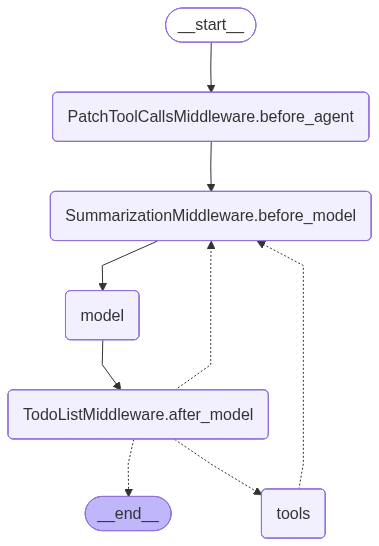

In [ ]:
## #Model
from langchain.chat_models import init_chat_model
from deepagents import create_deep_agent

model = init_chat_model(model="gpt-5")
agent = create_deep_agent(model=model)
agent

In [ ]:
result = agent.invoke({"messages": [{"role": "user", "content": "What is deepagent?"}]})
result

{'messages': [HumanMessage(content='What is deepagent?', additional_kwargs={}, response_metadata={}, id='4958884a-de7d-4cd8-814c-b6e97386faa1'),
  AIMessage(content='Do you mean “deep agent” in general, or something specifically named “DeepAgent”? A few possibilities:\n\n- Generic concept: a deep agent is an autonomous AI agent that uses deep learning (often LLMs plus tools, memory, and planners) to perceive, reason, and act.\n- RL libraries: several open‑source projects named “DeepAgent” provide frameworks for deep reinforcement learning experiments in Python.\n- Security products: some vendors use “DeepAgent” to refer to an endpoint protection/EDR agent powered by deep learning.\n- Customer support/ops: a few companies brand their GenAI contact-center agents as “DeepAgent.”\n\nIf you can share a link or the context (library, product, or paper), I can give a precise explanation.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 803, 'prompt

### System Prompt
Deep agents come with a built-in system prompt inspired by Claude Code’s system prompt. The default system prompt contains detailed instructions for using the built-in planning tool, file system tools, and subagents.
Each deep agent tailored to a use case should include a custom system prompt specific to that use case.

In [ ]:
from deepagents import create_deep_agent

research_instructions = """\
You are an expert researcher. Your job is to conduct \
thorough research, and then write a polished report. \
"""

agent = create_deep_agent(
    model=model,
    system_prompt=research_instructions,
)
result = agent.invoke({"messages": [{"role": "user", "content": "What is deepagent?"}]})
result

{'messages': [HumanMessage(content='What is deepagent?', additional_kwargs={}, response_metadata={}, id='472a54aa-f8df-4740-a7c1-6e6a8f9c33ae'),
  AIMessage(content='Could you share a bit more context? “DeepAgent” refers to several different things, including:\n- An open-source Python library/framework for deep reinforcement learning (often styled deepagent/DeepAgent on GitHub/PyPI)\n- A few commercial “AI agent”/automation products branded DeepAgent\n- Research projects/papers that use “DeepAgent” as a model or system name\n\nIf you can point me to a link, the domain (RL library vs. commercial product vs. research), or where you heard it, I can give a precise explanation and a concise comparison to related tools.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 834, 'prompt_tokens': 4475, 'total_tokens': 5309, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 704, 'rejected_prediction_tok

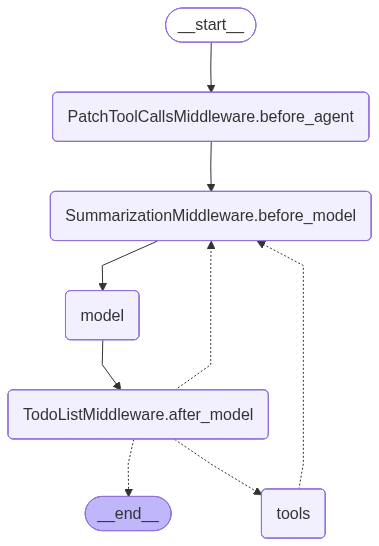

In [ ]:
agent

In [ ]:
### Tools
import os
from typing import Literal
from tavily import TavilyClient
from deepagents import create_deep_agent

tavily_client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

def internet_search(
    query: str,
    max_results: int = 5,
    topic: Literal["general", "news", "finance"] = "general",
    include_raw_content: bool = False,
):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
        include_raw_content=include_raw_content,
        topic=topic,
    )

agent = create_deep_agent(
    model=model,
    tools=[internet_search]
)
result = agent.invoke({"messages": [{"role": "user", "content": "What is deepagent in Agentic AI?"}]})
result

{'messages': [HumanMessage(content='What is deepagent in Agentic AI?', additional_kwargs={}, response_metadata={}, id='69e9c583-1d34-434c-8e41-c738f304dd3f'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 179, 'prompt_tokens': 4518, 'total_tokens': 4697, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 4480}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cw0gZziJDWPV92ctxVNPRkpCzTPZI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019ba189-648b-7ad2-b64f-308d8b3b40e4-0', tool_calls=[{'name': 'internet_search', 'args': {'query': 'deepagent Agentic AI what is Deepagent', 'max_results': 5, 'topic': 'general', 'include_raw_content': False}, 'id': 'call_zeMOL3WtSWtgfh